In [29]:
import pandas as pd
from IPython.display import display, HTML
import numpy as np
from sklearn.utils import resample
from IPython.display import display
import numpy as np

# Create a connection with SQL server to get data.
def exec_sql_query(query, param=None):
    
    from sqlalchemy import create_engine
    import urllib
    params = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};SERVER=LAPTOP-C3LFVOFI;DATABASE=student_life;UID=student_sense;PWD=abhinav123")
    engine = create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)
    connection = engine.raw_connection()
    
    try:
        cursor = connection.cursor()
        if(param):
            cursor.execute(query, param)
        else : 
            cursor.execute(query)
            
        results = cursor.fetchall()
        columns = [column[0] for column in cursor.description]
        df = pd.DataFrame.from_records(results, columns=columns)
        cursor.close()
        connection.commit()
    finally:
        connection.close()
    
    del engine
    return df

In [30]:
# Fetching EMA data from SQL.
sql = "Exec get_sleep_data_for_viz"
sleep_data = exec_sql_query(sql)
sleep_data.date = pd.to_datetime(sleep_data.date) 

# consisder only 45 days of data.
start_date='2013-03-24'
end_date='2013-05-08'

sleep_data_filtered = sleep_data[np.logical_and(sleep_data['date'] >= start_date, sleep_data['date'] < end_date)]
sleep_data_filtered.index = sleep_data_filtered['date']
display(sleep_data_filtered.head())

,date,max_hours_slept,min_hours_slept,avg_hours_slept,distinct_students
date,,,,,
2013-03-25,2013-03-25,8,8,8,1
2013-03-26,2013-03-26,8,7,7,1
2013-03-27,2013-03-27,9,5,7,21
2013-03-28,2013-03-28,10,2,7,28
2013-03-29,2013-03-29,9,4,6,31


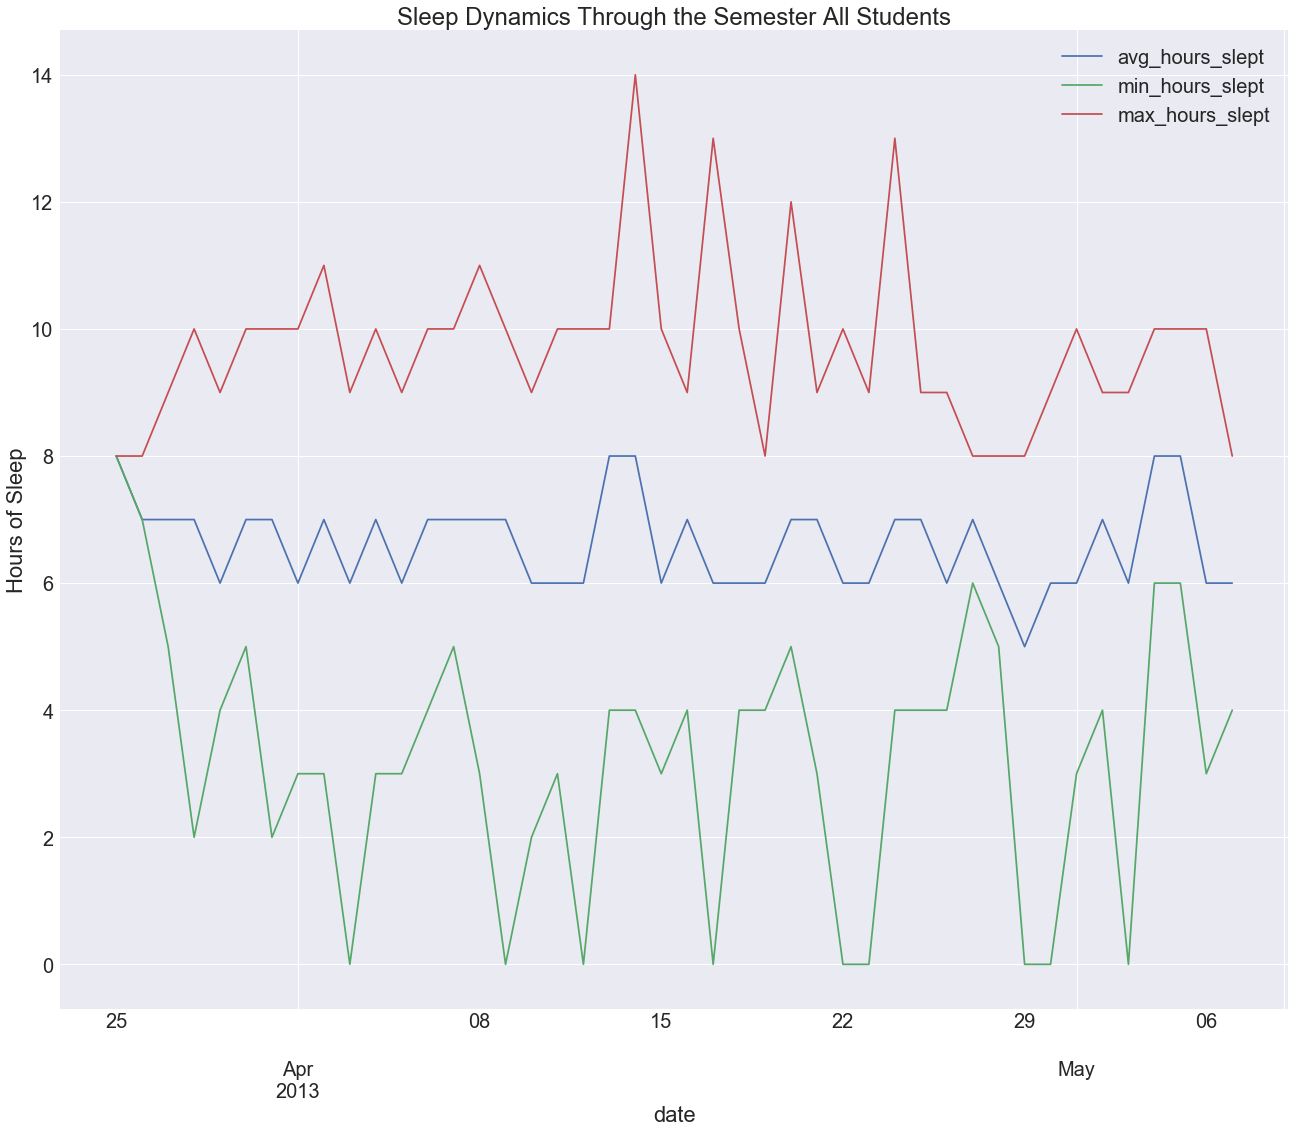

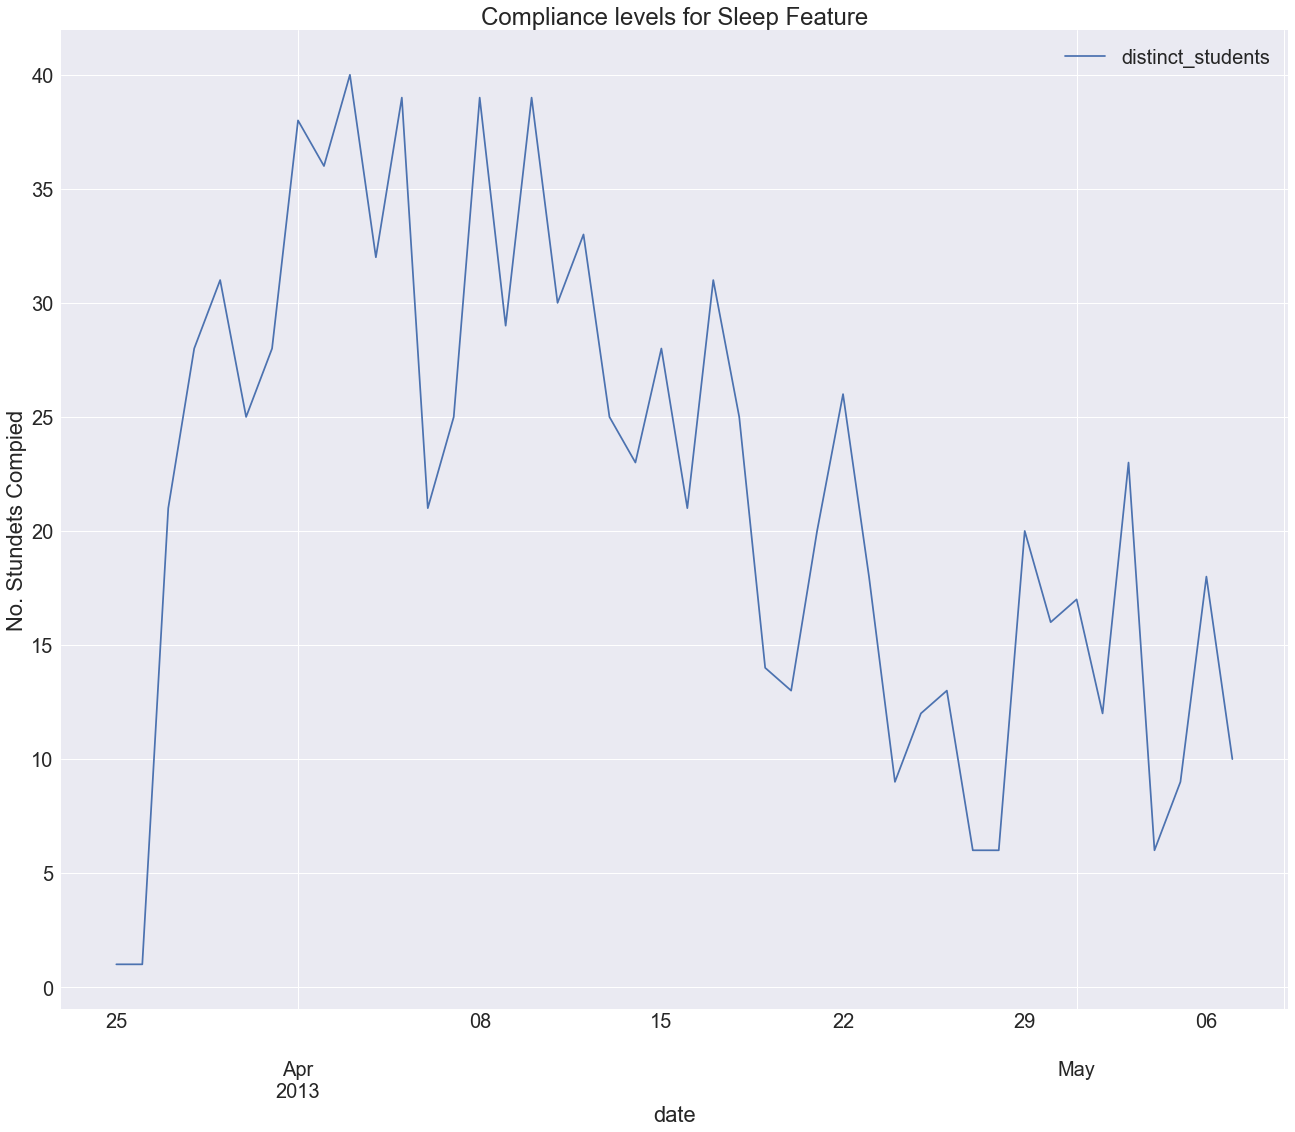

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set(font_scale = 2)

ax1 = sleep_data_filtered.plot(y='avg_hours_slept', figsize=(22,18), title="Sleep Dynamics Through the Semester All Students")
sleep_data_filtered.plot(y='min_hours_slept', ax=ax1)
sleep_data_filtered.plot(y='max_hours_slept', ax=ax1)
ax1.set_ylabel("Hours of Sleep")
plt.savefig("Plots/SleepViz/SleepDynamics.jpg")

ax2 = sleep_data_filtered.plot(y='distinct_students',figsize=(22,18), title="Compliance levels for Sleep Feature")
ax2.set_ylabel("No. Stundets Compied")
plt.savefig("Plots/SleepViz/SleepCompliance.jpg")
